In [1]:
#TODO try to understand graphic in Paper
#TODO ein Batch raussuchen und den x_decay, h_decay und raw_input und Mittelwerte zu vergleichen
#TODO das auch noch abspeichern
# => da wo 1 ist, ist vlt Wert ? => wie interpretieren wir Werte ?
# => können wir die Richtung bzw. Steigung und Abfall bestimmen

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from collections import Counter

In [2]:
df_x = pd.read_csv("decay_x.csv")
print(f"{len(df_x) = }")
print(f"{len(df_x.columns) = }")
df_x

len(df_x) = 64
len(df_x.columns) = 323


,0,1,2,3,4,5,6,7,8,9,...,313,314,315,316,317,318,319,320,321,322
0,1.0,1.0,0.969606,0.958225,1.0,1.0,0.954192,1.0,0.983433,0.959457,...,0.945379,0.985705,0.962631,1.0,0.954004,0.997086,1.0,0.963317,0.982738,0.995481
1,1.0,1.0,0.968963,0.958225,1.0,1.0,0.954192,1.0,0.983433,0.958545,...,0.945379,0.985631,0.962631,1.0,0.947744,0.997086,1.0,0.968429,0.982738,0.995481
2,1.0,1.0,0.968963,0.959886,1.0,1.0,0.950311,1.0,0.983433,0.959457,...,0.945379,0.985668,0.962631,1.0,0.954004,0.997086,1.0,0.963317,0.993873,0.995481
3,1.0,1.0,0.969606,0.959886,1.0,1.0,0.954192,1.0,0.983433,0.959457,...,0.942711,0.985631,0.962631,1.0,0.954004,0.997086,1.0,0.963317,0.993873,0.995481
4,1.0,1.0,0.968963,0.959886,1.0,1.0,0.954192,1.0,0.983433,0.959457,...,0.945379,0.985631,0.962631,1.0,0.954004,0.997086,1.0,0.963317,0.982738,0.995481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1.0,1.0,0.968963,0.959886,1.0,1.0,0.954192,1.0,0.995604,0.959457,...,0.945379,0.985631,0.962631,1.0,0.954004,0.997086,1.0,0.973568,0.982738,0.995481
60,1.0,1.0,0.968963,0.958225,1.0,1.0,0.952897,1.0,0.983433,0.958545,...,0.945379,0.985631,0.962631,1.0,0.954004,0.997086,1.0,0.963317,0.988290,0.995481
61,1.0,1.0,0.968963,0.959886,1.0,1.0,0.954192,1.0,0.983433,0.959457,...,0.945379,0.985631,0.962631,1.0,0.954004,0.997086,1.0,0.963317,0.982738,0.995481
62,1.0,1.0,0.968963,0.959886,1.0,1.0,0.954192,1.0,0.987473,0.958545,...,0.945379,0.985631,0.962631,1.0,0.954004,0.997086,1.0,0.963317,0.982738,0.995481


In [3]:
df_h = pd.read_csv("decay_h.csv")
df_h

,0,1,2,3,4,5,6,7,8,9,...,313,314,315,316,317,318,319,320,321,322
0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,0.861094,0.915508,1.000000,...,1.0,1.0,1.0,1.0,0.998694,1.000000,1.0,1.000000,1.0,1.0
1,1.0,1.0,1.0,0.940089,1.0,1.000000,1.0,0.923332,1.000000,1.000000,...,1.0,1.0,1.0,1.0,0.974262,1.000000,1.0,1.000000,1.0,1.0
2,1.0,1.0,1.0,1.000000,1.0,0.965981,1.0,0.874565,0.915489,0.976922,...,1.0,1.0,1.0,1.0,0.941697,1.000000,1.0,1.000000,1.0,1.0
3,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,0.883092,0.963961,1.000000,...,1.0,1.0,1.0,1.0,0.973121,0.997797,1.0,1.000000,1.0,1.0
4,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,0.822154,0.906980,0.974548,...,1.0,1.0,1.0,1.0,0.996527,0.946454,1.0,0.989823,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,0.895414,0.972354,0.994537,...,1.0,1.0,1.0,1.0,1.000000,0.974891,1.0,1.000000,1.0,1.0
60,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,0.914902,0.994017,0.994627,...,1.0,1.0,1.0,1.0,0.936919,1.000000,1.0,1.000000,1.0,1.0
61,1.0,1.0,1.0,1.000000,1.0,0.980341,1.0,0.817049,0.942168,0.961748,...,1.0,1.0,1.0,1.0,0.951079,1.000000,1.0,1.000000,1.0,1.0
62,1.0,1.0,1.0,0.955808,1.0,1.000000,1.0,0.890569,0.980685,1.000000,...,1.0,1.0,1.0,1.0,0.958838,1.000000,1.0,1.000000,1.0,1.0


In [4]:
df_input_x = pd.read_csv("input_x.csv")
df_input_x

,0,1,2,3,4,5,6,7,8,9,...,313,314,315,316,317,318,319,320,321,322
0,0.820759,0.846023,0.000000,0.854786,0.837707,0.844229,0.000000,0.775341,0.805886,0.875068,...,0.868411,0.000000,0.811196,0.775004,0.797139,0.810076,0.000000,0.852054,0.752863,0.000000
1,0.000000,0.839468,0.000000,0.798038,0.806096,0.000000,0.778923,0.860159,0.809371,0.818484,...,0.821758,0.829381,0.792011,0.000000,0.000000,0.784196,0.776655,0.845047,0.830118,0.853699
2,0.786486,0.865950,0.000000,0.842785,0.808165,0.817280,0.000000,0.860231,0.802152,0.823903,...,0.843544,0.800559,0.000000,0.777958,0.764850,0.842325,0.796723,0.000000,0.811020,0.769622
3,0.770435,0.781486,0.828218,0.819225,0.806886,0.804005,0.000000,0.791291,0.000000,0.849290,...,0.000000,0.821263,0.000000,0.759613,0.756480,0.805611,0.753279,0.843121,0.782411,0.788020
4,0.809094,0.850109,0.000000,0.809288,0.854049,0.802042,0.786743,0.808380,0.825753,0.849025,...,0.852784,0.813566,0.834716,0.000000,0.802155,0.844789,0.782669,0.000000,0.000000,0.815419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.000000,0.771964,0.791550,0.808486,0.769850,0.835793,0.790086,0.000000,0.788248,0.836497,...,0.896142,0.824115,0.000000,0.000000,0.000000,0.830402,0.825688,0.853098,0.802867,0.839867
60,0.815325,0.856574,0.863549,0.845256,0.839619,0.847236,0.841136,0.820416,0.791495,0.833498,...,0.846402,0.757579,0.736239,0.791284,0.825774,0.735626,0.746560,0.809454,0.000000,0.828682
61,0.799598,0.000000,0.000000,0.794279,0.788177,0.789665,0.832438,0.688073,0.764813,0.000000,...,0.799884,0.774312,0.750000,0.825688,0.698354,0.819316,0.796445,0.839362,0.779227,0.800459
62,0.755145,0.810694,0.781922,0.787357,0.789130,0.769453,0.000000,0.000000,0.000000,0.799889,...,0.000000,0.000000,0.825805,0.000000,0.676439,0.000000,0.732431,0.000000,0.718428,0.000000


In [5]:
df_mean_x = pd.read_csv("mean_x.csv")
df_mean_x

,0
0,0.629642
1,0.658508
2,0.649154
3,0.637877
4,0.651751
...,...
318,0.657885
319,0.639622
320,0.666058
321,0.625147


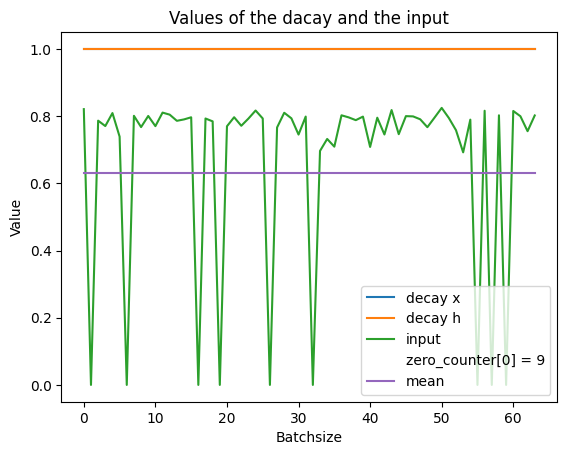

In [21]:
x = [i for i in range(64)]
plt.plot(x, df_x["0"], label="decay x")
plt.plot(x, df_h["0"], label="decay h")
plt.plot(x, df_input_x["0"], label="input")
plt.plot(x, [df_mean_x.iloc[0] for _ in range(64)], label="mean")
plt.title("Values of the dacay and the input")
plt.xlabel("Batchsize")
plt.ylabel("Value")
plt.legend()
plt.show()

In [29]:
temp

[0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 Name: 0, dtype: float64,
 0    0.629642
 

df_mean_x.iloc[0].values[0] = 0.62964153


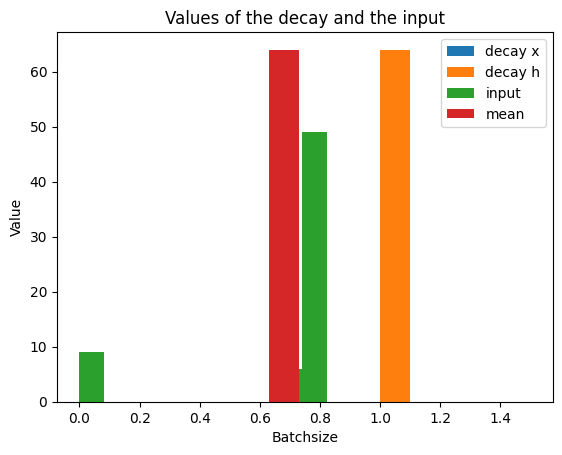

In [35]:
x = [i for i in range(64)]
print(f"{df_mean_x.iloc[0].values[0] = }")
plt.hist(df_x["0"], label="decay x")
plt.hist(df_h["0"], label="decay h")
plt.hist(df_input_x["0"], label="input")
plt.hist([df_mean_x.iloc[0].values[0] for _ in range(64)], label="mean")
plt.title("Values of the decay and the input")
plt.xlabel("Batchsize")
plt.ylabel("Value")
plt.legend()
plt.show()

In [8]:
"""TODO
# für jede column plot machen --> ordner anlegen mit Namen "plots/comparison"
# df erstellen mit folgenden Werten --> mean von x_decay, y_decay, input_x
# --> weitere Werte sind Abweichung zum von den decays
# --> max und min wert der decays und vom input
"""
df_mean_x.iloc[0].values[0]

0.62964153

In [ ]:
x = [i for i in range(len(df_x))]
os.makedirs("plots", exist_ok=True)
os.makedirs(os.path.join("plots", "plots"), exist_ok=True)
os.makedirs(os.path.join("plots", "hists"), exist_ok=True)
comparison_dict = {"decay_x_mean": [], "decay_h_mean": [], "input_x_mean": [], "mean_x": [],
                   "decay_x_max": [], "decay_h_max": [], "input_x_max": [],
                   "decay_x_min": [], "decay_h_min": [], "input_x_min": [],
                   "decay_x_mean_deviation": [], "decay_h_mean_deviation": [], "input_x_mean_deviation": [],
                   "number_of_zero_values":[]}

print("So it begins")
for i in tqdm(range(len(df_x.columns))):

    zero_counter = Counter(df_input_x[str(i)])[0]

    # plotting plots
    plt.plot(x, df_x[str(i)], label="decay x")
    plt.plot(x, df_h[str(i)], label="decay h")
    plt.plot(x, df_input_x[str(i)], label="input")
    plt.plot([], [], ' ', label=f"{zero_counter = }")
    plt.plot(x, [df_mean_x.iloc[i].values[0] for _ in range(len(df_x))], label="input_mean")
    plt.title("Values of the decays and the input")
    plt.xlabel("Batchindex")
    plt.ylabel("Value")
    plt.legend()
    plt.savefig(os.path.join("plots", "plots", f"plot_{i}.png"))
    plt.clf()

    # plotting histograms
    plt.hist(df_x[str(i)], label="decay x")
    plt.hist(df_h[str(i)], label="decay h")
    plt.hist(df_input_x[str(i)], label="input")
    plt.hist([df_mean_x.iloc[i].values[0] for _ in range(len(df_x))], label="input_mean")
    plt.title("Histogram of the decays and the input")
    plt.xlabel("Value")
    plt.ylabel("Counts")
    plt.legend()
    plt.savefig(os.path.join("plots", "hists", f"hist_{i}.png"))
    plt.clf()

    # saving values for the csv file
    comparison_dict["number_of_zero_values"].append(zero_counter)

    comparison_dict["decay_x_mean"].append(np.mean(df_x[str(i)]))
    comparison_dict["decay_h_mean"].append(np.mean(df_h[str(i)]))
    comparison_dict["input_x_mean"].append(np.mean(df_input_x[str(i)]))
    comparison_dict["mean_x"].append(df_mean_x.iloc[i].values[0])

    comparison_dict["decay_x_max"].append(np.max(df_x[str(i)]))
    comparison_dict["decay_h_max"].append(np.max(df_h[str(i)]))
    comparison_dict["input_x_max"].append(np.max(df_input_x[str(i)]))

    comparison_dict["decay_x_min"].append(np.min(df_x[str(i)]))
    comparison_dict["decay_h_min"].append(np.min(df_h[str(i)]))
    comparison_dict["input_x_min"].append(np.min(df_input_x[str(i)]))

    comparison_dict["decay_x_mean_deviation"].append(np.abs(np.mean(df_x[str(i)]) - df_mean_x.iloc[i].values[0]))
    comparison_dict["decay_h_mean_deviation"].append(np.abs(np.mean(df_h[str(i)]) - df_mean_x.iloc[i].values[0]))
    comparison_dict["input_x_mean_deviation"].append(np.abs(np.mean(df_input_x[str(i)]) - df_mean_x.iloc[i].values[0]))

df_comparison = pd.DataFrame(comparison_dict).to_csv("Comparison.csv", index=False)
# plt.show()

print("Es ist fertig geworden")

In [45]:
os.makedirs(os.path.join("plots", "separate_plots"), exist_ok=True)

counter = 0
max_counter = 10
# decay x
for i in tqdm(range(len(df_x.columns))):

    if counter == max_counter:
        break

    if int(np.unique(df_x[str(i)])[0]) or int(np.unique(df_h[str(i)])[0]):
        continue

    plt.plot(x, df_x[str(i)], label=f"{i}")
    plt.title("Values of the decays_x")
    plt.xlabel("Batchindex")
    plt.ylabel("Value")
    plt.legend()
    counter += 1
plt.savefig(os.path.join("plots", "separate_plots", "plot_decay_x.png"))
plt.clf()

counter = 0
# decay h
for i in tqdm(range(len(df_h.columns))):

    if counter == max_counter:
        break

    if int(np.unique(df_x[str(i)])[0]) or int(np.unique(df_h[str(i)])[0]):
        continue

    plt.plot(x, df_h[str(i)], label=f"{i}")
    plt.title("Values of the decays_h")
    plt.xlabel("Batchindex")
    plt.ylabel("Value")
    plt.legend()
    counter += 1
plt.savefig(os.path.join("plots", "separate_plots", "plot_decay_h.png"))
plt.clf()

counter = 0
# input x
for i in tqdm(range(len(df_x.columns))):

    if counter == max_counter:
        break

    if int(np.unique(df_x[str(i)])[0]) or int(np.unique(df_h[str(i)])[0]):
        continue

    plt.plot(x, df_input_x[str(i)], label=f"{i}")
    plt.title("Values of the input x")
    plt.xlabel("Batchindex")
    plt.ylabel("Value")
    plt.legend()
    counter += 1
plt.savefig(os.path.join("plots", "separate_plots", "plot_input_x.png"))
plt.clf()

counter = 0
# input x mean
for i in tqdm(range(len(df_x.columns))):

    if counter == max_counter:
        break

    if int(np.unique(df_x[str(i)])[0]) or int(np.unique(df_h[str(i)])[0]):
        continue

    plt.plot(x, [df_mean_x.iloc[i].values[0] for _ in range(len(df_x))], label=f"{i}")
    plt.title("Values of the input x mean")
    plt.xlabel("Batchindex")
    plt.ylabel("Value")
    plt.legend()
    counter += 1
plt.savefig(os.path.join("plots", "separate_plots", "plot_input_x_mean.png"))
plt.clf()

 11%|█         | 36/323 [00:00<00:00, 412.35it/s]


<Figure size 640x480 with 0 Axes>

In [41]:
int(np.unique(df_h["0"])[0])

1